# Stationary Stochastic Processes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def import_dta(link):
    name = pd.read_stata(link)
    return name

### 2.2
Create a scatter plot to identify if there is serial dependency for lag k = 1,2,3 in the GNP series. Add the means and the regression line.

In [31]:
gnp = import_dta("C:\\Users\\gonza\\Documents\\GitHub\\TSA\\data\\GNP.dta")

In [32]:
gnp.head()

,GNP
0,0.00632
1,0.00366
2,0.01202
3,0.00627
4,0.01761


In [33]:
len(gnp['GNP'])

176

In [34]:
gnp['time'] = pd.Series(pd.period_range('1/1/1947', freq='Q', periods=176))

In [35]:
def lag(df, var, n_lags = 1):
    for i in np.arange(1,n_lags+1):
        lag_name = "lag" + str(i)
        df[lag_name] = df[var].shift(-i)

In [36]:
lag(gnp, "GNP")

In [37]:
gnp.head()

,GNP,time,lag1
0,0.00632,1947Q1,0.00366
1,0.00366,1947Q2,0.01202
2,0.01202,1947Q3,0.00627
3,0.00627,1947Q4,0.01761
4,0.01761,1948Q1,0.00918


[Text(0, 0.5, 'lag1'), Text(0.5, 0, 'GNP')]

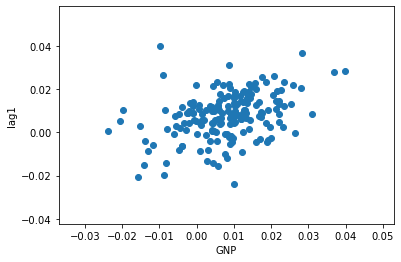

In [46]:
fig, ax = plt.subplots()
ax.scatter(gnp["GNP"], gnp["lag1"])
ax.set(xlabel = "GNP", ylabel = "lag1")